In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [185]:
import seaborn as sn

#to supress Warnings 
import warnings
warnings.filterwarnings("ignore")

In [6]:
#stopwords

In [7]:
#import nltk
#nltk.download('stopwords')

In [8]:
#NLP
from nltk.corpus import stopwords
#stop = set(stopwords.words('english'))
#stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','']) # remove it if you need punctuation 
from nltk.stem import WordNetLemmatizer

In [9]:
from PIL import Image
#from termcolor import colored

# Read data:

In [10]:
%pwd

'C:\\Users\\elh\\Desktop\\data\\Resolution'

In [188]:
data = pd.read_csv('..//food_coded.csv')
data.shape

(125, 61)

In [189]:
data.head(1)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187


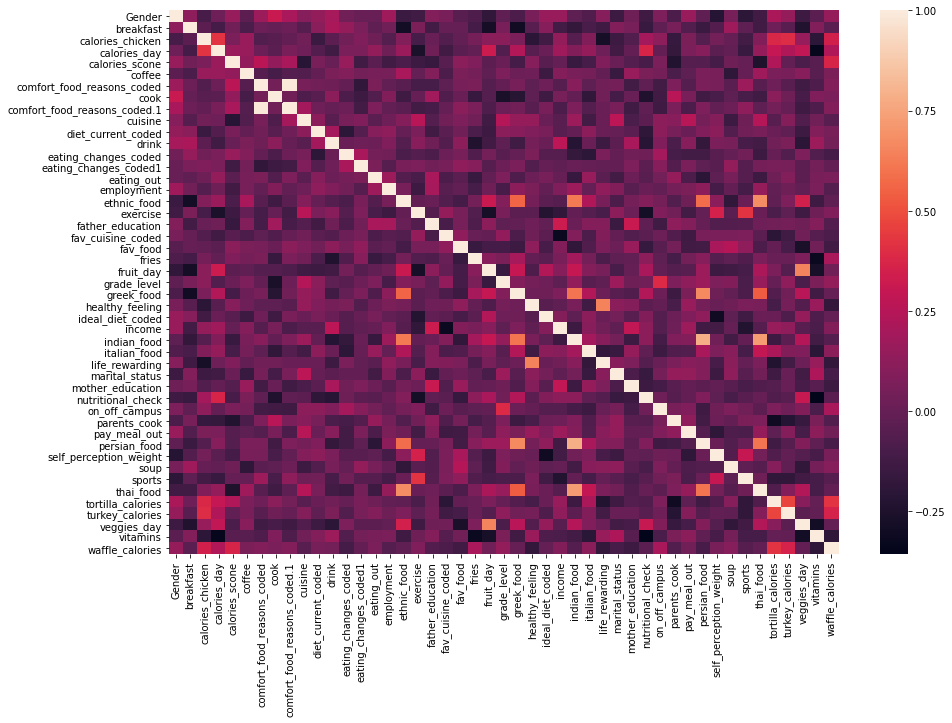

In [190]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sn.heatmap(data.corr())

# Feature classification:

In [17]:
features = data.columns

In [59]:
features_by_dtype = {}
for f in features:
    dtype = str(data[f].dtype)
    
    if dtype not in features_by_dtype.keys():
        features_by_dtype[dtype] = [f]
    else:
        features_by_dtype[dtype] += [f]

In [64]:
keys = features_by_dtype.keys()
#[i for i in keys]

## Unique

In [67]:
for k in keys:
    dtype_list = features_by_dtype[k]
    for f in dtype_list:
        string = "{}: {}".format(f,len(data[f].unique()))
        print(string)

GPA: 39
comfort_food: 125
comfort_food_reasons: 108
diet_current: 125
eating_changes: 122
father_profession: 115
fav_cuisine: 61
food_childhood: 115
healthy_meal: 125
ideal_diet: 125
meals_dinner_friend: 122
mother_profession: 113
type_sports: 68
weight: 48
Gender: 2
breakfast: 2
calories_chicken: 4
coffee: 2
comfort_food_reasons_coded.1: 8
diet_current_coded: 4
eating_changes_coded: 4
eating_changes_coded1: 13
eating_out: 5
ethnic_food: 5
fav_cuisine_coded: 9
fries: 2
fruit_day: 5
grade_level: 4
greek_food: 5
healthy_feeling: 10
ideal_diet_coded: 8
indian_food: 5
italian_food: 3
nutritional_check: 5
parents_cook: 4
pay_meal_out: 5
thai_food: 5
turkey_calories: 4
veggies_day: 5
vitamins: 2
waffle_calories: 4
calories_day: 4
calories_scone: 4
comfort_food_reasons_coded: 10
cook: 6
cuisine: 7
drink: 3
employment: 4
exercise: 4
father_education: 6
fav_food: 4
income: 7
life_rewarding: 11
marital_status: 4
mother_education: 6
on_off_campus: 5
persian_food: 6
self_perception_weight: 7
soup:

## Check the type:

One correct line 

In [191]:
line_clean_data = data[1:2]
line_clean_data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155


In [94]:
features = data.columns

In [100]:
features_by_dtype = {}
for f in features:
    dtype = str(line_clean_data[f].dtype)
    
    if dtype not in features_by_dtype.keys():
        features_by_dtype[dtype] = [f]
    else:
        features_by_dtype[dtype] += [f]

In [101]:
keys = features_by_dtype.keys()

# Check binary data :

In [121]:
binary_features = [f for f in dtype_list if len(data[f].unique()) < 12 ]
categorical_features = binary_features
numerical_features = [f for f in dtype_list if f not in categorical_features]
count_features = numerical_features

In [122]:
categorical_features

['calories_day',
 'calories_scone',
 'comfort_food_reasons_coded',
 'cook',
 'cuisine',
 'drink',
 'employment',
 'exercise',
 'father_education',
 'fav_food',
 'income',
 'life_rewarding',
 'marital_status',
 'mother_education',
 'on_off_campus',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'tortilla_calories']

# Missing data

In [124]:
dictionary = {}

for feature in features:
    
    column = data[feature]
    
    has_null = any(column.isnull())
    
    if(has_null):
        
        null_count = column.isnull().value_counts()[True]
        not_null_count = column.notnull().value_counts()[True]
        total_rows = len(column)
        
        row = {}
        row["Null Count"] = null_count
        row["Not Null Count"] = not_null_count
        row["Null Count / Total Rows"] = "%s / %s" %  (null_count, total_rows)
        row["Percentage of Nulls"] = "%.2f" % ((null_count / total_rows) * 100) + "%"
        row["Ratio (Not Null : Null)"] = "%.2f : 1" %  ((null_count / not_null_count))
        
        dictionary[feature] = row

ordered_columns = ["Null Count", "Not Null Count", "Ratio (Not Null : Null)", "Null Count / Total Rows", "Percentage of Nulls"]

from pandas import DataFrame

new_dataframe = DataFrame.from_dict(data = dictionary, orient="index")
new_dataframe[ordered_columns].sort_values("Null Count", ascending=False)

,Null Count,Not Null Count,Ratio (Not Null : Null),Null Count / Total Rows,Percentage of Nulls
type_sports,21,104,0.20 : 1,21 / 125,16.80%
comfort_food_reasons_coded,19,106,0.18 : 1,19 / 125,15.20%
calories_day,19,106,0.18 : 1,19 / 125,15.20%
cuisine,17,108,0.16 : 1,17 / 125,13.60%
exercise,13,112,0.12 : 1,13 / 125,10.40%
employment,9,116,0.08 : 1,9 / 125,7.20%
cook,3,122,0.02 : 1,3 / 125,2.40%
mother_education,3,122,0.02 : 1,3 / 125,2.40%
meals_dinner_friend,3,122,0.02 : 1,3 / 125,2.40%
eating_changes,3,122,0.02 : 1,3 / 125,2.40%


# Try to convert to float : GPA

### Delete strings

In [140]:
data = pd.read_csv('..//food_coded.csv')
data.shape

(125, 61)

In [141]:
data['GPA'].head(1)

0    2.4
Name: GPA, dtype: object

In [142]:
data['GPA'].str.replace('[a-z]|[A-Z]|\,|\'|\s','')

0        2.4
1      3.654
2        3.3
3        3.2
4        3.5
       ...  
120      3.5
121        3
122    3.882
123        3
124      3.9
Name: GPA, Length: 125, dtype: object

In [143]:
data['GPA']=data['GPA'].str.replace('[a-z]|[A-Z]|\,|\'|\s','')

### replace nan values

In [144]:
data['GPA'].fillna(0,inplace=True)

### replace void with values

In [146]:
data['GPA'].replace(to_replace='',value=0,inplace=True)

### convert to float

In [147]:
data['GPA'] = data['GPA'].astype('float')

### replace 0 with average

In [151]:
gpa_mean = round(data['GPA'].mean(),3)

In [152]:
data['GPA'].replace(to_replace=0,value=gpa_mean,inplace=True)

In [153]:
data['GPA'].unique()

array([2.4  , 3.654, 3.3  , 3.2  , 3.5  , 2.25 , 3.8  , 3.904, 3.4  ,
       3.6  , 3.1  , 3.309, 4.   , 2.2  , 3.87 , 3.7  , 3.9  , 2.8  ,
       3.   , 3.65 , 3.89 , 2.9  , 3.605, 3.83 , 3.292, 3.35 , 2.6  ,
       3.67 , 3.73 , 3.79 , 2.71 , 3.68 , 3.75 , 3.92 , 3.77 , 3.63 ,
       3.882])

# Calories day:

In [168]:
data['calories_day'].unique()

array([nan,  3.,  4.,  2.])

In [175]:
data['calories_day'].value_counts()

3.0    63
4.0    23
2.0    20
Name: calories_day, dtype: int64

In [177]:
data['calories_day'].fillna(0,inplace=True)

In [180]:
cal_day_median = data['calories_day'].median()

In [181]:
cal_day_median

3.0

In [182]:
data['calories_day'].replace(to_replace=0,value=cal_day_median,inplace=True)

### To int

In [183]:
data['calories_day'] = data['calories_day'].astype('int')

In [184]:
data['calories_day'].value_counts()

3    82
4    23
2    20
Name: calories_day, dtype: int64

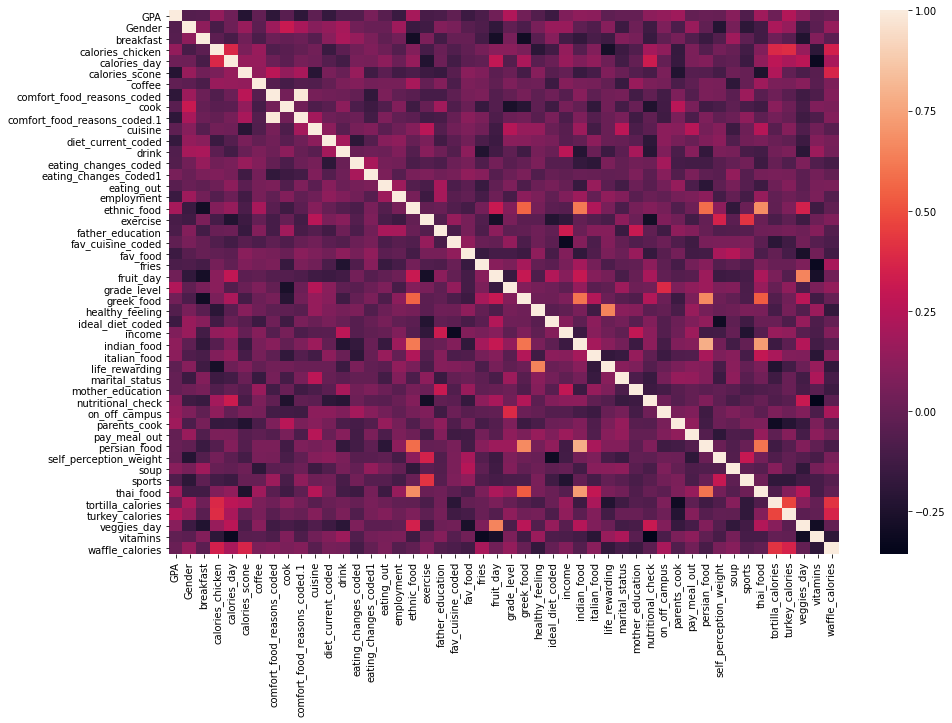

In [186]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sn.heatmap(data.corr())